In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import math

**Example** Consider the signal $\mathbf{x}\in\mathbb{R}^{300}$ constructed by the following commands:

In [2]:
n = 300
t = np.linspace(0, 4, n)
x = np.sin(t) + t*(np.cos(t)**2)

In [3]:
b = x + 0.05 * np.random.randn(n)

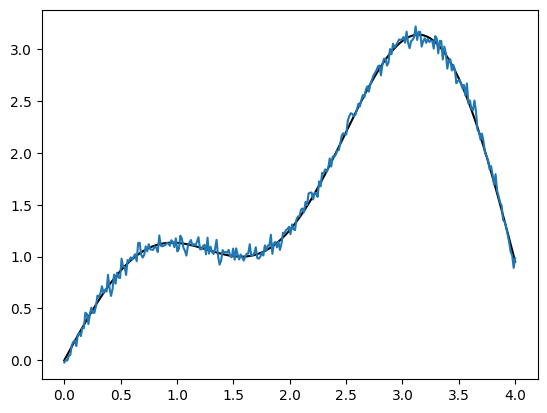

In [4]:
# red = data, black = true signal
plt.plot(t, x, 'black')
plt.plot(t, b.T, c='#1f77b4')
plt.show() # this line suppresses text output

In [5]:
L = np.asmatrix(np.zeros((n-1, n)))
for i in range(0,n-1):
    L[i,i] = 1
    L[i,i+1] = -1

In [6]:
L

matrix([[ 1., -1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1., -1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., -1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1., -1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1., -1.]])

In [7]:
lam = 10 # set lambda value
x_rls = np.linalg.solve(np.eye(n) + lam * L.T @ L, b)

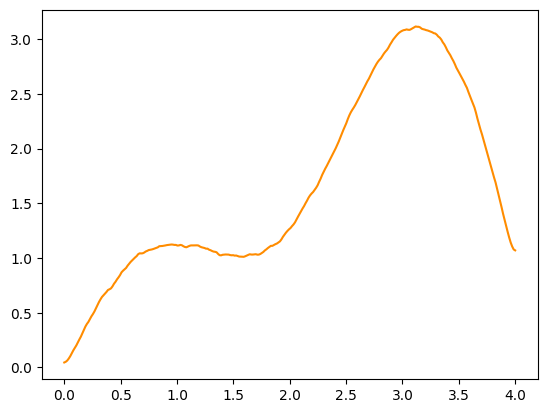

In [8]:
#plt.plot(t, x)
#plt.plot(t, b.T)
plt.plot(t, x_rls, 'darkorange')
plt.show()

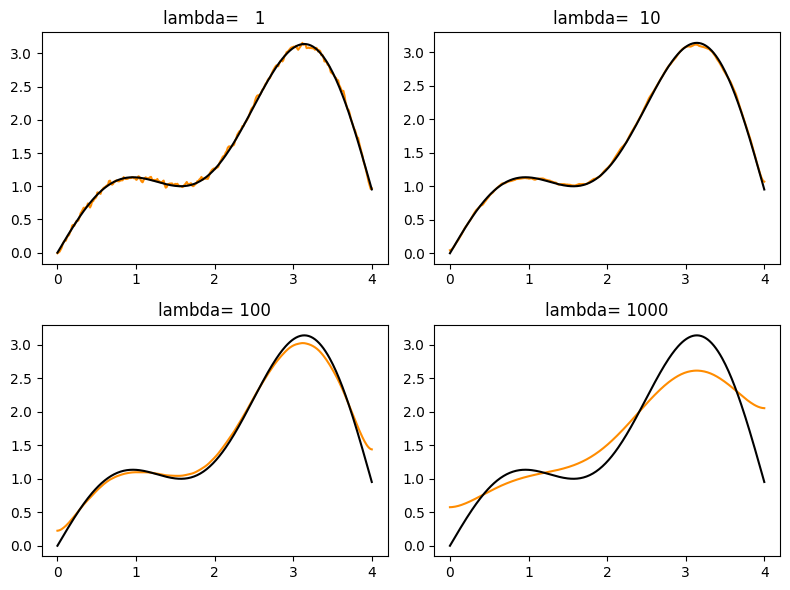

In [9]:
fig = plt.figure(figsize=(8, 6))
lam = np.array([1, 10, 100, 1000])
for j in range(4):
    ax = fig.add_subplot(2, 2, j+1)
    x_rls = np.linalg.solve(np.eye(n) + lam[j] * L.T @ L, b)
    ax.plot(t, x_rls, 'darkorange')
    ax.plot(t, x, 'black')
    ax.set_title('lambda= %3d' %lam[j])
plt.tight_layout()
plt.show()

**Real life example** Apple stock

In [10]:
apple_stocks = pd.read_csv('AAPL.csv')

In [11]:
apple_stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-12,159.589996,164.259995,159.300003,163.429993,162.466187,104956000
1,2022-09-13,159.899994,160.539993,153.369995,153.839996,152.932739,122656600
2,2022-09-14,154.789993,157.100006,153.610001,155.309998,154.394058,87965400
3,2022-09-15,154.649994,155.240005,151.380005,152.369995,151.471420,90481100
4,2022-09-16,151.210007,151.350006,148.369995,150.699997,149.811264,162278800
...,...,...,...,...,...,...,...
247,2023-09-06,188.399994,188.850006,181.470001,182.910004,182.910004,81755800
248,2023-09-07,175.179993,178.210007,173.539993,177.559998,177.559998,112488800
249,2023-09-08,178.350006,180.240005,177.789993,178.179993,178.179993,65551300
250,2023-09-11,180.070007,180.300003,177.339996,179.360001,179.360001,58863800


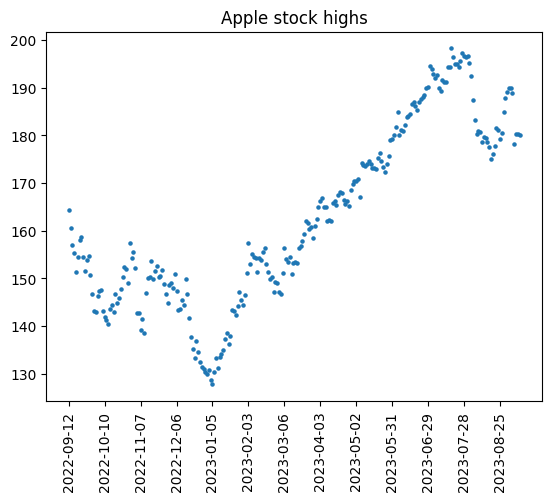

In [12]:
plt.scatter(apple_stocks.Date, apple_stocks.High, s=5)
plt.xticks(list(range(len(apple_stocks)))[0::20])
plt.tick_params(axis='x',rotation=90)
plt.title('Apple stock highs')
plt.show()

In [13]:
n = len(apple_stocks)
t = np.linspace(0, 4, n)

In [14]:
L = np.asmatrix(np.zeros((n-1, n)))
for i in range(0,n-1):
    L[i,i] = 1
    L[i,i+1] = -1

In [15]:
lam = 10 # set lambda value
x_rls = np.linalg.solve(np.eye(n) + lam * L.T @ L, np.array(apple_stocks.High))

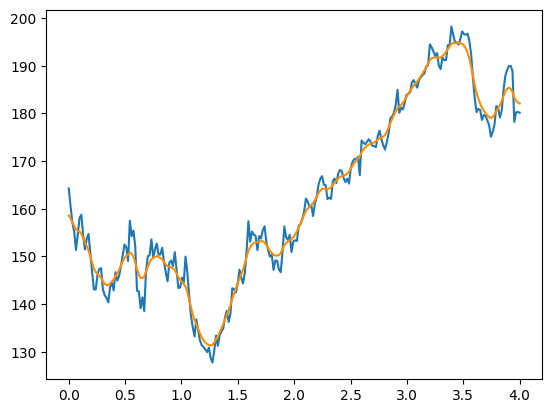

In [16]:
#plt.plot(t, x)
plt.plot(t, np.array(apple_stocks.High).T)
plt.plot(t, x_rls, 'darkorange')
plt.show()

**Your turn** Find some data online and apply this denoising procedure

In [25]:
data.columns

Index(['date', 'geoid', 'cases', 'cases_avg', 'cases_avg_per_100k', 'deaths',
       'deaths_avg', 'deaths_avg_per_100k'],
      dtype='object')

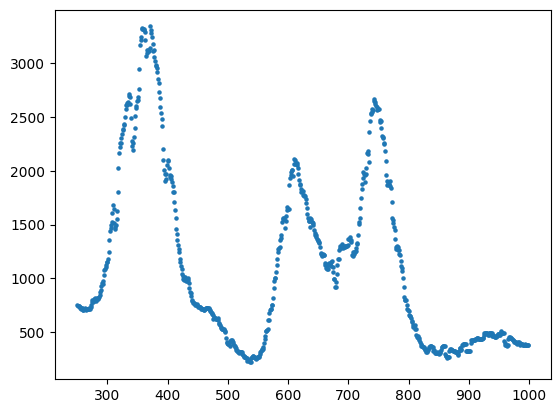

In [50]:
data = pd.read_csv('us.csv')
data 

day = data.index[250:1000]
x = data["deaths_avg"][250:1000]
plt.scatter(day, x, s=5)


In [51]:
n = len(t)
t = np.linspace(0, 4, n)

In [52]:
L = np.asmatrix(np.zeros((n-1, n)))
for i in range(0,n-1):
    L[i,i] = 1
    L[i,i+1] = -1

In [53]:
lam = 10 # set lambda value
x_rls = np.linalg.solve(np.eye(n) + lam * L.T @ L, np.array(x))

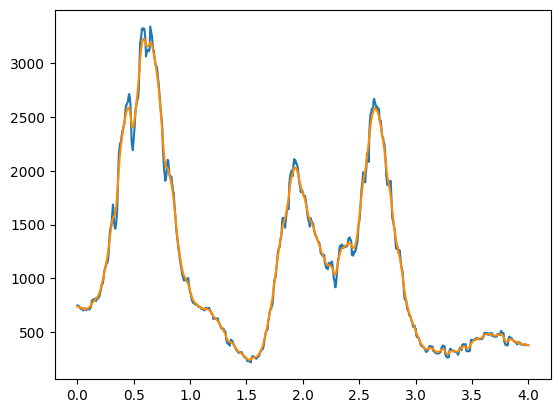

In [54]:
#plt.plot(t, x)
plt.plot(t,x)
plt.plot(t, x_rls, 'darkorange')
plt.show()

**Example** Circle Fitting

In [59]:
# create a circle of radius 1.2 centered at the point (3,4)
r = 1.2
x_star = np.array([3,4])

In [60]:
n = 100
noise = 0.01 * np.random.randn(n)
theta = np.linspace(0,2*math.pi,n)
a = (r*np.array([np.cos(theta), np.sin(theta)])+noise).T + x_star#parameterized equation of a circle

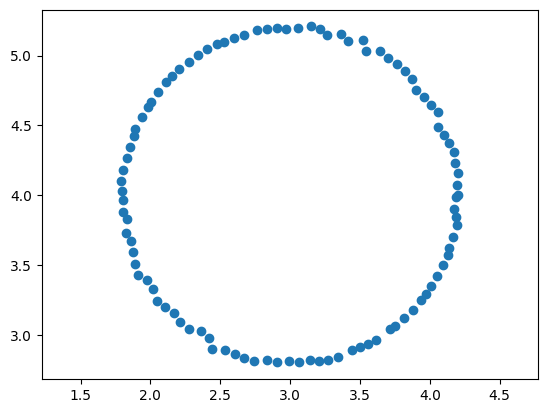

In [61]:
plt.scatter(a.T[0],a.T[1])
plt.axis('equal')
plt.show()

In [62]:
b = np.diag(a@a.T)
A = np.concatenate((2*a, -1*np.ones([n,1])), axis=1)

In [63]:
x_ls = np.linalg.lstsq(A,b, rcond=None)[0]

In [64]:
x_ls

array([ 3.00001784,  4.00012446, 23.5621817 ])

In [65]:
np.sqrt(np.linalg.norm(x_ls[[0,1]])**2-x_ls[2])

1.1995503671242818

In [68]:
A = np.matrix([[0, 1], [1, 1], [2, 1]])
(A.T@A).I

matrix([[ 0.5       , -0.5       ],
        [-0.5       ,  0.83333333]])

In [71]:
5/6

0.8333333333333334